In [2]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
data = pd.read_csv('../../Cleaned/machine_learn_testing.csv')


,Unnamed: 0,Age,Previous Accident,Previous DWI,Previous Speeding,Time Group,INJ_SEV,Helmet Use,January,February,...,Drug Use Reported,No Drinking,Drinking Reported,Clear Weather,Rainy Weather,Foggy Weather,Severly Windy Weather,Blowing Sand Weather,Other Weather,Cloudy Weather
0,0,26,0,0,3,Party Time,2,1,1,0,...,1,1,0,1,0,0,0,0,0,0
1,1,40,0,0,3,Party Time,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,2,86,0,0,0,Party Time,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,3,26,0,0,0,Party Time,2,1,1,0,...,1,1,0,1,0,0,0,0,0,0
4,4,41,0,0,0,Party Time,2,1,1,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,3834,79,0,0,0,Mid Afternoon,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3835,3835,19,0,0,0,Mid Afternoon,2,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3836,3836,28,0,0,0,Party Time,2,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3837,3837,38,0,0,0,Party Time,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [91]:
data = data.drop(columns=['Unnamed: 0','Time Group'])
# data = data.rename(columns={"DAY_x": "DAY", "MONTH_x": "MONTH","HOUR_x": "HOUR", "MINUTE_x":"MINUTE", "DR_DRINK": "DRUNK_DRIVER", "INJ_SEV": "INJ_SEVERITY"})
list(data.columns)

['Age',
 'Helmet Use',
 'Previous Accident',
 'Previous DWI',
 'Previous Speeding',
 'INJ_SEV',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Male',
 'Female',
 'Gender Nuetral',
 'No Drugs',
 'Drug Use Reported',
 'No Drinking',
 'Drinking Reported',
 'Clear Weather',
 'Rainy Weather',
 'Foggy Weather',
 'Severly Windy Weather',
 'Blowing Sand Weather',
 'Other Weather',
 'Cloudy Weather']

In [5]:
label_cols = ['Gender Nuetral','Helmet Use','Previous ''Previous Accident','Previous DWI','Previous Speeding','INJ_SEV','January','February','March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Male',
 'Female',
 'Gender Nuetral',
 'No Drugs',
 'Drug Use Reported',
 'No Drinking',
 'Drinking Reported',
 'Clear Weather',
 'Rainy Weather',
 'Foggy Weather',
 'Severly Windy Weather',
 'Blowing Sand Weather',
 'Other Weather',
 'Cloudy Weather']

for col in label_cols:
 print(f"List of unique labels for {col} ::: {set(data[col])}")

List of unique labels for Gender Nuetral ::: {0, 1}
List of unique labels for Helmet Use ::: {0, 1}


In [92]:
# X = data.drop("INJ_SEV", axis =1)
# y = data("INJ_SEV")

# print ('X: ' + X.shape, 'y: '+ y.shape)

X = data.drop("INJ_SEV", axis=1)
y = data["INJ_SEV"]
print(X.shape, y.shape)

(3839, 38) (3839,)


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, stratify=y)

In [121]:
from sklearn.linear_model import LogisticRegression
weights = {0:0.25,1:0.5,2:0.25}
classifier = LogisticRegression(C=1, max_iter=10000, solver='sag', multi_class='auto', class_weight=weights)
classifier


LogisticRegression(C=1, class_weight={0: 0.25, 1: 0.5, 2: 0.25}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [122]:
# classifier.coef_

In [123]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 0.25, 1: 0.5, 2: 0.25}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [124]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8370962139631817
Testing Data Score: 0.8322916666666667


In [125]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}") 

First 10 Predictions:   [2 2 2 0 2 2 2 2 2 2]
First 10 Actual labels: [2, 2, 2, 0, 2, 2, 2, 2, 1, 2]


In [126]:
probs = classifier.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(No Injury)": [p[0] for p in probs], 
    "P(Injury)": [p[1] for p in probs],
    "P(Fatility)": [p[2] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(No Injury),P(Injury),P(Fatility)
0,2,2,0.096530,0.264891,0.638579
1,2,2,0.115335,0.286184,0.598481
2,2,2,0.130304,0.274797,0.594898
3,0,0,0.520598,0.314777,0.164625
4,2,2,0.093660,0.279077,0.627264
5,2,2,0.084451,0.228152,0.687397
6,2,2,0.063607,0.199289,0.737104
7,2,2,0.108034,0.222789,0.669177
8,2,1,0.099512,0.447523,0.452965
9,2,2,0.126242,0.227195,0.646562


In [127]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[247   0  28]
 [ 66   4  62]
 [  0   5 548]]


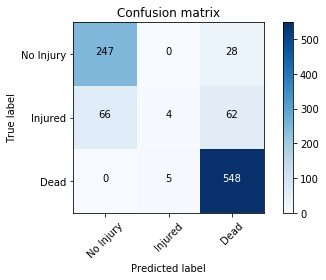

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)

plot_confusion_matrix(cm, cmap=plt.cm.Blues, classes=['No Injury','Injured','Dead'])